## Model Analysis: vanilla_net, one_hidden_net, many_hidden_net

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [27]:
pred = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f.csv', names=['orig'])
pred_sig = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f_sig.csv', names=['sig'])
pred_sgd = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f_sig_sgd.csv', names=['sgd'])
pred_adam = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f_sig_adam.csv', names=['adam'])
pred_many = pd.read_csv('../src/predict/predictions/many_hidden_audio_adam.csv', names=['many'])
pred_filter = pd.read_csv('../src/predict/predictions/many_hidden_audio_filterbanks.csv', names=['filterb'])
true = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')
true_filterbank = pd.read_csv('../../../Source/Data/y_test_audio_filterbanks.csv')
pred_aug = pd.read_csv('../src/predict/predictions/many_hidden_audio_augmented.csv', names=['aug'])
true_aug = pd.read_csv('../../../Source/Data/y_test_audio_augmented.csv')

In [3]:
results = pd.concat([pred, pred_sig, pred_sgd, pred_adam, pred_many, true], axis= 1)
results.head()

,orig,sig,sgd,adam,many,Labels
0,1,1,1,1,0,1
1,1,1,1,1,1,1
2,1,1,0,1,1,1
3,0,0,0,0,0,0
4,0,0,1,1,1,0


In [28]:
results_filterbank = pd.concat([pred_filter, true_filterbank], axis=1)
results_augments = pd.concat([pred_aug, true_aug], axis=1)

In [5]:
#mistakes = results.copy()
#mistakes = mistakes.loc[~(mistakes['Labels'] == mistakes['orig']| mistakes['sig'] | mistakes['sgd'] | mistakes['adam'])]
#mistakes

In [29]:
acc_dict = {}
for i in results.columns[:5]:
    acc_dict[str(i)]= accuracy_score(y_pred=results[str(i)], y_true=results['Labels'])
acc_dict['filterb'] = accuracy_score(y_pred=results_filterbank['filterb'], y_true=results_filterbank['Labels'])
acc_dict['aug'] = accuracy_score(y_pred=results_augments['aug'], y_true=results_augments['Labels'])

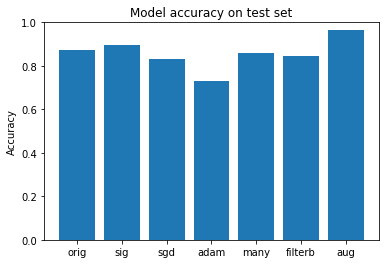

In [30]:
plt.bar(range(len(acc_dict)), acc_dict.values(), align='center')
plt.xticks(range(len(acc_dict)), list(acc_dict.keys()))
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Model accuracy on test set');

In [31]:
acc_dict

{'orig': 0.8717948717948718,
 'sig': 0.8974358974358975,
 'sgd': 0.8333333333333334,
 'adam': 0.7307692307692307,
 'many': 0.8589743589743589,
 'filterb': 0.8461538461538461,
 'aug': 0.9647435897435898}

## Training Errors

In [32]:
error = pd.read_csv('../src/train/train_errors/vanilla_mfccplus.csv', names=['vanilla'])
error_2 = pd.read_csv('../src/train/train_errors/one_hidden.csv', names=['one_hid'])
error_3 = pd.read_csv('../src/train/train_errors/one_hidden_20f.csv', names=['one_hid_20f'])
error_4 = pd.read_csv('../src/train/train_errors/one_hidden_20f_sig.csv', names=['one_hid_20f_sig'])
error_5 = pd.read_csv('../src/train/train_errors/one_hidden_20f_sig_sgd.csv', names=['one_hid_20f_sgd'])
error_6 = pd.read_csv('../src/train/train_errors/one_hidden_20f_sig_adam.csv', names=['one_hid_20f_adam'])
error_7 = pd.read_csv('../src/train/train_errors/many_hidden_adam.csv', names=['many_hid_adam'])
error_8 = pd.read_csv('../src/train/train_errors/many_hidden_filterbanks.csv', names=['many_hid_filterbanks'])
error_9 = pd.read_csv('../src/train/train_errors/many_hidden_augmented.csv', names=['many_hid_aug'])

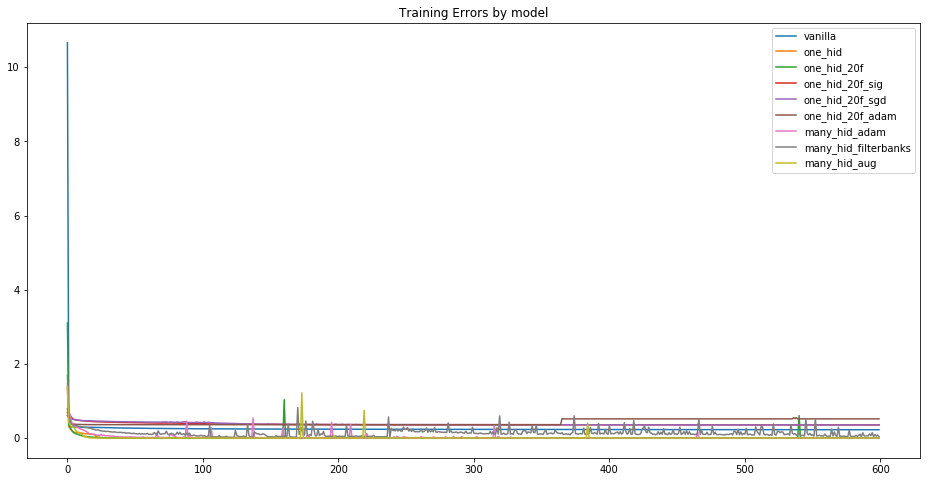

In [33]:
train_errors = pd.concat([error, error_2, error_3, error_4, error_5, error_6, error_7, error_8, error_9], axis =1)
train_errors.plot(figsize=(16,8), title='Training Errors by model');